In [18]:
from pymaf import maf
from concord import concord, robust_selection
import pandas as pd
import numpy as np
import matplotlib.pylab as plt

In [16]:
prices = pd.read_csv('../concord/src/flatData.csv')
prices = prices.pivot(columns="ticker", index="date", values="close")
prices.head()

ticker,AA,AXP,BA,BAC,CAT,CSCO,CVX,DD,DIS,GE,...,MRK,MSFT,PFE,PG,T,TRV,UTX,VZ,WMT,XOM
date,,,,,,,,,,,,,,,,,,,,,
1990-03-26,5.22,4.50,15.50,4.71,4.66,0.08,7.47,8.92,7.61,2.89,...,5.54,0.59,1.33,5.13,5.25,5.10,4.31,8.09,4.59,5.85
1990-03-27,5.25,4.46,15.66,4.72,4.65,0.08,7.50,9.04,7.69,2.93,...,5.67,0.59,1.36,5.19,5.36,5.04,4.30,8.20,4.64,5.96
1990-03-28,5.31,4.42,15.69,4.69,4.62,0.08,7.57,8.98,7.64,2.93,...,5.71,0.58,1.38,5.18,5.42,5.04,4.33,8.23,4.67,5.92
1990-03-29,5.26,4.37,15.58,4.65,4.62,0.08,7.60,8.98,7.55,2.91,...,5.64,0.58,1.39,5.14,5.45,5.17,4.40,8.23,4.65,5.90
1990-03-30,5.16,4.31,15.45,4.60,4.61,0.08,7.59,8.95,7.49,2.90,...,5.52,0.58,1.37,5.10,5.43,5.19,4.35,8.30,4.64,5.92


In [17]:
f, w = maf(prices.values)

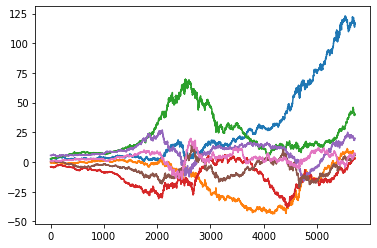

In [102]:
n_mafs = 7
plt.plot(f[:, :n_mafs])
n_samples, n_stocks = f.shape


In [103]:
f_hat = np.hstack((np.ones(n_samples)[:, np.newaxis], f[:, :n_mafs]))
f_hat.T

array([[  1.        ,   1.        ,   1.        , ...,   1.        ,
          1.        ,   1.        ],
       [  2.41003576,   2.41521306,   2.44372074, ..., 117.56396795,
        116.79968373, 116.22342064],
       [ -0.73500331,  -0.73457148,  -0.70420957, ...,   3.52704361,
          3.31527501,   3.38703828],
       ...,
       [  5.57461937,   5.59970119,   5.56646868, ...,  20.26201849,
         20.1250636 ,  20.12975227],
       [  0.42800833,   0.40687571,   0.44060161, ...,   6.08885728,
          6.32061578,   5.78608008],
       [  0.8744006 ,   0.84961768,   0.81250255, ...,   6.64327381,
          6.69994762,   7.26963328]])

In [104]:
coefs, residuals, rank, s = np.linalg.lstsq(f_hat, prices.values, rcond=-1)

In [105]:
prices_hat = np.dot(f_hat, coefs)

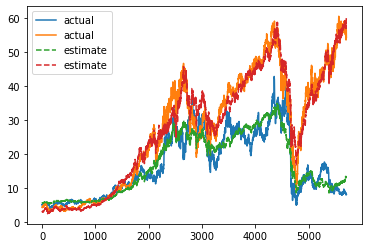

In [106]:
# Plot
plt.plot(prices.values[:, :2], label="actual")
plt.plot(prices_hat[:, :2], "--", label="estimate")
plt.legend()

In [107]:
price_residuals = prices.values - prices_hat

In [108]:
norm_residuals = price_residuals / np.std(price_residuals, axis=0)

In [109]:
opt_lambda = robust_selection(norm_residuals)
opt_lambda

0.04424215456302252

In [110]:
omega = concord(norm_residuals, opt_lambda*2)

In [111]:
print(f"Sparsity: {len(omega.nonzero()[0]) / (n_stocks*n_stocks - n_stocks)}")

Sparsity: 0.6268472906403941


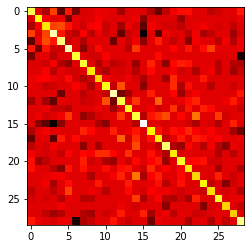

In [112]:
plt.imshow(omega.todense(), cmap='hot', interpolation='nearest')
plt.show()

(array([[24.,  4.,  0.,  0.,  1.],
        [27.,  0.,  1.,  0.,  1.],
        [25.,  3.,  0.,  0.,  1.],
        [23.,  4.,  1.,  0.,  1.],
        [26.,  2.,  0.,  0.,  1.],
        [26.,  1.,  1.,  0.,  1.],
        [26.,  1.,  0.,  1.,  1.],
        [28.,  0.,  0.,  1.,  0.],
        [28.,  0.,  0.,  1.,  0.],
        [28.,  0.,  0.,  0.,  1.],
        [27.,  1.,  0.,  1.,  0.],
        [26.,  2.,  0.,  0.,  1.],
        [25.,  3.,  0.,  0.,  1.],
        [26.,  2.,  0.,  1.,  0.],
        [24.,  4.,  0.,  1.,  0.],
        [26.,  1.,  1.,  0.,  1.],
        [25.,  3.,  0.,  0.,  1.],
        [23.,  5.,  0.,  1.,  0.],
        [27.,  1.,  0.,  1.,  0.],
        [28.,  0.,  0.,  1.,  0.],
        [28.,  0.,  0.,  1.,  0.],
        [28.,  0.,  0.,  1.,  0.],
        [25.,  3.,  0.,  1.,  0.],
        [27.,  1.,  0.,  1.,  0.],
        [28.,  0.,  0.,  1.,  0.],
        [27.,  1.,  0.,  0.,  1.],
        [27.,  1.,  0.,  1.,  0.],
        [28.,  0.,  1.,  0.,  0.],
        [26.,  1.,  

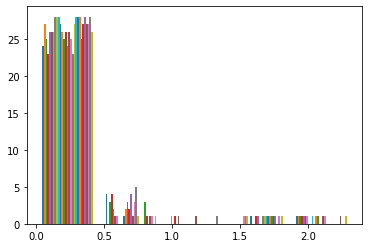

array([[1.95496366, 0.10537014, 0.11828739, 0.63221298, 0.6471068 ,
        0.46376829, 0.62054424, 0.24054554, 0.        , 0.05385344,
        0.03259941, 0.        , 0.44006614, 0.        , 0.05413738,
        0.31571408, 0.29778315, 0.80365498, 0.08787702, 0.        ,
        0.08436812, 0.30352593, 0.        , 0.10986601, 0.        ,
        0.14190987, 0.        , 0.        , 0.11035334],
       [0.10537014, 1.99556674, 0.28045424, 0.        , 0.        ,
        0.9508394 , 0.        , 0.03704147, 0.1447286 , 0.16462502,
        0.15632995, 0.        , 0.        , 0.        , 0.24656925,
        0.15280104, 0.08136709, 0.        , 0.        , 0.07290077,
        0.        , 0.        , 0.1187639 , 0.10122571, 0.04813403,
        0.11652202, 0.        , 0.        , 0.        ],
       [0.11828739, 0.28045424, 2.23342644, 0.56862422, 0.23955995,
        0.        , 0.        , 0.14065844, 0.        , 0.3174796 ,
        0.60583439, 0.08958815, 0.35431081, 0.        , 0.        ,
  